In [2]:
import os
import torch
import torch.nn as nn
import numpy as np
import time
import random
import math
import copy
from matplotlib import pyplot as plt


[ 3.34103854e-07 -4.15018863e-05  1.67171108e-03 -1.88491161e-02
  2.39339276e-01]
2.1570472437206885


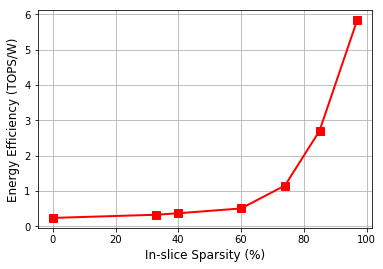

In [27]:
sparsity = [0, 33, 40, 60, 74, 85, 97]
energy = [0.24, 0.33, 0.372, 0.508, 1.157, 2.703, 5.832]
power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.230]
#plt.figure(figsize=(4,4))
color = (255/255, 0, 0)
# plt.figure(figsize =(3.4,2.5), dpi = 200 )
plt.plot(sparsity, energy, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

from numpy import polyfit, poly1d
coeff = polyfit(sparsity, energy, 4)
print(coeff)
f = poly1d(coeff)
# plt.plot(sparsity, f(sparsity), 'k-')
print(f(82))
# plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('In-slice Sparsity (%)', size=12)
plt.ylabel('Energy Efficiency (TOPS/W)', size=12)
plt.grid(True)

plt.show()

coeff: [ 9.75754532e-12 -3.15061823e-09  3.89942378e-07 -2.29929994e-05
  6.45977954e-04 -6.88522126e-03  2.10800000e-01]


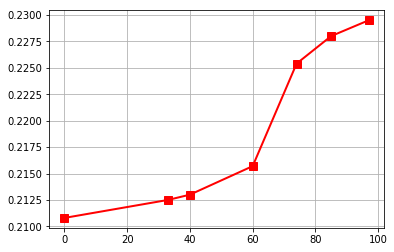

In [36]:
sparsity = [0, 33, 40, 60, 74, 85, 97]
power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.2295]
color = (255/255, 0, 0)
plt.plot(sparsity, power, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

plt.grid(True)

coeff = polyfit(sparsity, power, 6)
# f = poly1d(coeff)
# plt.plot(sparsity, f(sparsity), 'x-', marker='^',  linewidth=2, markersize=8)
print("coeff: {}".format(coeff))
plt.show()

0.0903766666666667


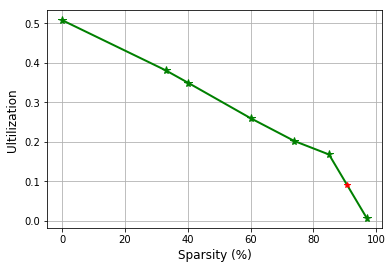

In [6]:
ultilization = [0.508, 0.381, 0.35, 0.26, 0.202, 0.168, 0.0074]
plt.plot(sparsity, ultilization, 'x-', marker='*', color='green',  linewidth=2, markersize=8, label='energy efficiency')
fetch_sparsity = 100- 9.2
fetch_energy = np.interp(fetch_sparsity, sparsity, ultilization)
print(fetch_energy)
plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('Sparsity (%)', size=12)
plt.ylabel('Ultilization ', size=12)
plt.grid(True)
plt.show()

In [41]:
# -*- coding: utf-8 -*- 
import  xdrlib ,sys
import xlrd
def open_excel(file= '../source/paper_JSSC.xls'):
    try:
        data = xlrd.open_workbook(file)
        return data
    except: # Exception,e:
        print("read error ")
        
def excel_table_byindex(file= 'file.xls',colnameindex=0,by_index=0, nrows = 1):
    data = open_excel(file)
    table = data.sheets()[by_index]
#     nrows = table.nrows #ÐÐÊý
    ncols = table.ncols #ÁÐÊý
    colnames =  table.row_values(colnameindex) #Ä³Ò»ÐÐÊý¾Ý 
    list =[]
    for rownum in range(1,nrows):

         row = table.row_values(rownum)
         if row:
             app = {}
             for i in range(len(colnames)):
                app[colnames[i]] = row[i] 
             list.append(app)
    return list

voltage =[]
frequency =[]
power =[]
tables = excel_table_byindex(file='/workspace/Sagitta_Fig/source/Paper_JSSC.xls',by_index=4, nrows =19)
for row in tables:
   print(row)
   voltage.append(row['Voltage-Frequency Scaling'])
   frequency.append(row['Clock Frequency(MHz)'])
   power.append(row['Power(mW)'])



{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 5.0, 'Power(mW)': 0.009}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 10.0, 'Power(mW)': 0.0163}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 20.0, 'Power(mW)': 0.03}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 30.0, 'Power(mW)': 0.045}
{'Voltage-Frequency Scaling': 0.72, 'Clock Frequency(MHz)': 40.0, 'Power(mW)': 0.06}
{'Voltage-Frequency Scaling': 0.74, 'Clock Frequency(MHz)': 50.0, 'Power(mW)': 0.0788}
{'Voltage-Frequency Scaling': 0.77, 'Clock Frequency(MHz)': 60.0, 'Power(mW)': 0.1011}
{'Voltage-Frequency Scaling': 0.81, 'Clock Frequency(MHz)': 70.0, 'Power(mW)': 0.1294}
{'Voltage-Frequency Scaling': 0.85, 'Clock Frequency(MHz)': 80.0, 'Power(mW)': 0.1616}
{'Voltage-Frequency Scaling': 0.88, 'Clock Frequency(MHz)': 90.0, 'Power(mW)': 0.192}
{'Voltage-Frequency Scaling': 0.9, 'Clock Frequency(MHz)': 100.0, 'Power(mW)': 0.2254}
{'Voltage-Frequency Scaling': 0.95, 'Clock Frequenc

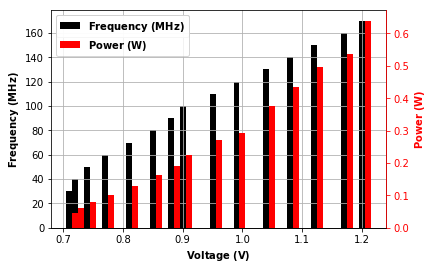

In [85]:

def plt_fig(fig_dict): # dict
    fig, ax = plt.subplots(1,1)
    color = fig_dict["y1_color"]
    family = fig_dict["family"]
    label_size = fig_dict["label_size"]
    if fig_dict['y1_fig_type'] == 'plot':
        ax.plot(fig_dict["x_value"], fig_dict["y1_value"], fig_dict["y1_linestyle"], marker=fig_dict["y1_marker"], color=color,  linewidth=fig_dict["linewidth"], markersize=fig_dict["markersize"], label=fig_dict["y1_label"])
    elif fig_dict['y1_fig_type'] == 'bar':
        ax.bar(fig_dict["x_value"], fig_dict["y1_value"],color=color, width=fig_dict['bar_width'], linewidth=fig_dict["linewidth"],label=fig_dict["y1_label"])
    else:
        print("Key Error 'fig_type'")
        os.exit()

    ax.set_xlabel(fig_dict["x_label"], size=label_size, family=family)
    ax.set_ylabel(fig_dict["y1_label"], size=label_size, color=color, family=family)
    ax.legend (loc='upper left')
    plt.grid(True)
    from matplotlib.pyplot import MultipleLocator
    inst = plt.gca()
    # x_major_locator=MultipleLocator(0.1)
    # inst.xaxis.set_major_locator(x_major_locator)
    # inst.set_xlim(0.65,1.25)
    handles1, labels1 = ax.get_legend_handles_labels()
    if "y2_name" in fig_dict:
        ax1 = ax.twinx()
        color1 = fig_dict["y2_color"]

        if fig_dict['y2_fig_type'] == 'plot':
            ax1.plot(fig_dict["x_value"], fig_dict["y2_value"], fig_dict["y2_linestyle"], marker=fig_dict["y2_marker"], color=color1,  linewidth=fig_dict["linewidth"], markersize=fig_dict["markersize"], label=fig_dict["y2_label"])
        elif fig_dict['y2_fig_type'] == 'bar':
            ax1.bar(np.array(fig_dict["x_value"])+fig_dict['bar_width'] if fig_dict['y1_fig_type'] == 'bar'else 0, fig_dict["y2_value"],color=color1, width=fig_dict['bar_width'], linewidth=fig_dict["linewidth"],label=fig_dict["y2_label"])
        else:
            print("Key Error 'fig_type'")
            os.exit()  

        ax1.set_ylabel(fig_dict["y2_label"], size=label_size, color=color1, family=family)

        handles2, labels2 = ax1.get_legend_handles_labels()
        plt.legend(handles1+handles2, labels1+labels2, loc='upper left')
        ax1.spines['right'].set_color(color1)
        ax1.tick_params(axis='y', colors=color1)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
    else:
        plt.legend(handles1, labels1, loc='upper left')
    if 'xticks' in fig_dict:
        plt.xticks(fig_dict['x_value'], fig_dict['xticks'])
    ax.spines['left'].set_color(color)
    ax.tick_params(axis='y', colors=color)
    plt.savefig(fig_dict["fig_name"], format='svg')
    plt.show()

plt_fig({   "x_name":"Voltage", 
            "x_value": voltage, 
            "x_label" : r"$\bf{Voltage}$"+' ' + r"$\bf{(V)}$",
            "y1_fig_type": "bar",
            "y1_name":"Frequency",
            "y1_value":frequency, 
            "y1_color":(0, 0, 0),
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Frequency}$"+' ' + r"$\bf{(MHz)}$",
            "y1_marker":'s',
            "y2_fig_type": "bar",
            "y2_name":"Power",
            "y2_value":power,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Power}$"+' ' + r"$\bf{(W)}$",
            "y2_marker":'^',
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.01,
            # "xticks": False,
            "fig_name" :'../../generate/Voltage-Frequency-Scaling.svg'
})

In [267]:
from mpl_toolkits.mplot3d import axes3d
class MyAxes3D(axes3d.Axes3D):

    def __init__(self, baseObject, sides_to_draw):
        self.__class__ = type(baseObject.__class__.__name__,
                              (self.__class__, baseObject.__class__),
                              {})
        self.__dict__ = baseObject.__dict__
        self.sides_to_draw = list(sides_to_draw)
        self.mouse_init()

    def set_some_features_visibility(self, visible):
        for t in self.w_zaxis.get_ticklines() + self.w_zaxis.get_ticklabels():
            t.set_visible(visible)
        self.w_zaxis.line.set_visible(visible)
        self.w_zaxis.pane.set_visible(visible)
        self.w_zaxis.label.set_visible(visible)

    def draw(self, renderer):
        # set visibility of some features False 
        self.set_some_features_visibility(False)
        # draw the axes
        super(MyAxes3D, self).draw(renderer)
        # set visibility of some features True. 
        # This could be adapted to set your features to desired visibility, 
        # e.g. storing the previous values and restoring the values
        self.set_some_features_visibility(True)

        zaxis = self.zaxis
        draw_grid_old = zaxis.axes._draw_grid
# disable draw grid
        zaxis.axes._draw_grid = False

        tmp_planes = zaxis._PLANES

        if 'l' in self.sides_to_draw :
            # draw zaxis on the left side
            zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                             tmp_planes[0], tmp_planes[1],
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)
        if 'r' in self.sides_to_draw :
            # draw zaxis on the right side
            zaxis._PLANES = (tmp_planes[3], tmp_planes[2], 
                             tmp_planes[1], tmp_planes[0], 
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)

        zaxis._PLANES = tmp_planes

        # disable draw grid
        zaxis.axes._draw_grid = draw_grid_old

[0.003 0.007 0.011 0.009 0.007 0.009 0.013 0.026 0.053 0.003 0.007 0.011
 0.009 0.007 0.009 0.013]


NameError: name 'MyAxes3D' is not defined

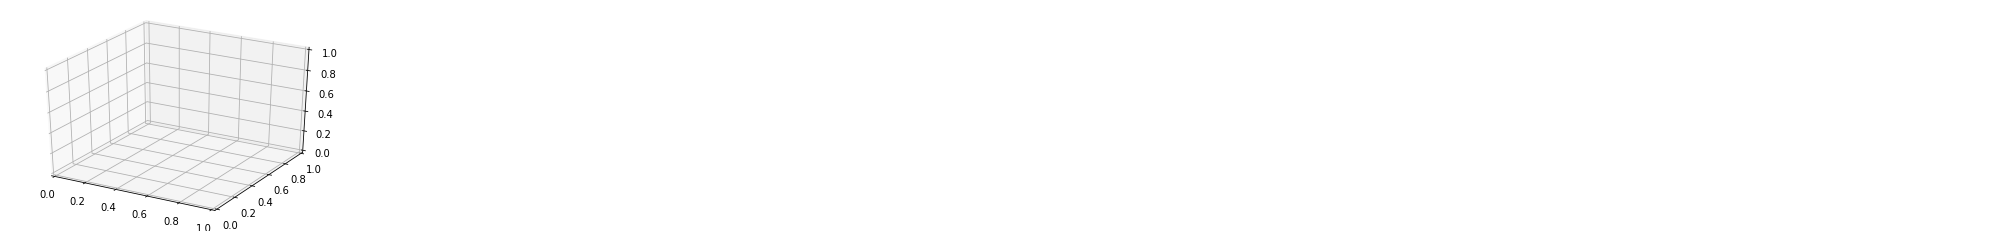

In [39]:
# ÔØÈëÄ£¿é
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
# import seaborn as sns
from scipy import interpolate

#Éú³ÉÊý¾Ý
# x = np.linspace(0.1,0.9,4)
x = np.array([1, 2, 3, 4])
# y = np.linspace(0.1,0.9,4)
y = np.array([88, 89, 96.5, 98])
# z = np.random.rand(16)
accuracy = np.array([0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948, 0.935, 0.908,
0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948     
    ])
# z = np.zeros(16)
# for i in range(16):
#     z[i] = 0.961 - accuracy[i]
z = 0.961 - accuracy
print(z)
#²åÖµ
# xx, yy = np.meshgrid(x, y)

f = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.linspace(1,4,5)
ynew = np.linspace(88,98,5)
znew = f(xnew, ynew)

#ÐÞ¸Äx,y£¬zÊäÈë»­Í¼º¯ÊýÇ°µÄshape
xx1, yy1 = np.meshgrid(xnew, ynew)
newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = xx1.reshape(newshape)
x_input = yy1.reshape(newshape)
z_input = znew.reshape(newshape)

#»­Í¼
# sns.set(style='white')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes(MyAxes3D(ax, 'l'))
ax.plot_trisurf(x_input,y_input,z_input,cmap=cm.coolwarm)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.savefig('../../generate/threshold-sparsity-accuracy.svg', format='svg')
plt.show()


In [271]:
import matplotlib
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


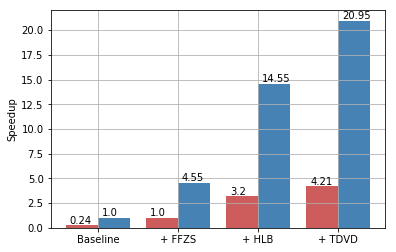

In [38]:
technique = ['Baseline', '+ FFZS', '+ HLB', '+ TDVD']
speedup = np.array([0.22, 1 ,3.2, 4.61])/0.22
energy_efficiency = np.array([0.24, 1 ,3.2, 4.21])

fig, ax = plt.subplots(1,1)
bar_width = 0.4
ax.set_xlabel(r"$\bf{Voltage}$"+' ' + r"$\bf{(V)}$", size=10, family="Arial")
ax.set_ylabel(r"$\bf{Frequency}$"+' ' + r"$\bf{(MHz)}$", size=10, color=color, family="Arial")
ax.legend (loc='upper left')
plt.grid(True)
from matplotlib.pyplot import MultipleLocator
inst = plt.gca()
x_major_locator=MultipleLocator(0.1)
inst.xaxis.set_major_locator(x_major_locator)
inst.set_xlim(0.65,1.25)

ax1 = ax.twinx()
color1 = (1, 0, 0)
plt.bar(x = np.arange(len(technique))+bar_width, height = speedup, label = 'Speedup', color = 'steelblue', width = bar_width)

ax1.set_ylabel(r"$\bf{Power}$"+' ' + r"$\bf{(W)}$", size=10, color=color1, family="Arial")
# ax1.legend(loc='upper right')
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax1.get_legend_handles_labels()
plt.legend(handles1+handles2, labels1+labels2, loc='upper left')

ax.spines['left'].set_color(color)
ax.tick_params(axis='y', colors=color)
# ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1.spines['right'].set_color(color1)
ax1.tick_params(axis='y', colors=color1)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.bar(x = np.arange(len(technique)), height = energy_efficiency, label = 'Energy efficiency', color = 'indianred', width = bar_width)

plt.xticks(np.arange(4)+0.2, technique)
plt.ylabel('Speedup')
# plt.legend()
for x in range(len(technique)):
#     print(x)
    plt.text(x-0.15+bar_width,speedup[x]+0.5,'%s' %round(speedup[x],2),va='center')
    plt.text(x-0.15,energy_efficiency[x]+0.5,'%s' %round(energy_efficiency[x],2),va='center')
plt.show()

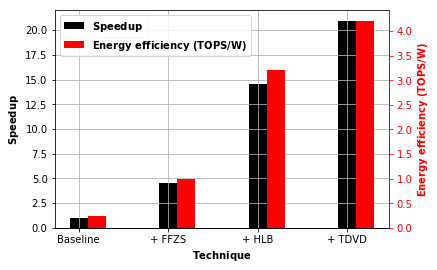

In [89]:
plt_fig({   "x_name":"Technique", 
            "x_value": np.arange(len(technique)), 
            "x_label" : r"$\bf{Technique}$",
            "y1_fig_type": "bar",
            "y1_name":"speedup",
            "y1_value":speedup, 
            "y1_color":(0, 0, 0),
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Speedup}$",
            "y1_marker":'s',
            "y2_fig_type": "bar",
            "y2_name":"energy_efficiency",
            "y2_value":energy_efficiency,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$"+' ' + r"$\bf{(TOPS/W)}$",
            "y2_marker":'^',
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.2,
            "xticks": technique,
            "fig_name" :'../../generate/technique.svg'
})

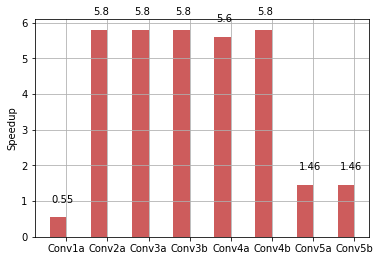

In [384]:
technique = ['Conv1a', 'Conv2a', 'Conv3a', 'Conv3b','Conv4a','Conv4b','Conv5a', 'Conv5b']
speedup = np.array([0.22, 1 ,3.2, 4.21])/0.22
energy_efficiency = np.array([0.546, 5.8, 5.8, 5.8, 5.6, 5.8, 1.458, 1.458])

bar_width = 0.4
# plt.bar(x = np.arange(len(technique))+bar_width, height = speedup, label = 'Speedup', color = 'steelblue', width = bar_width)
plt.bar(x = np.arange(len(technique)), height = energy_efficiency, label = 'Energy efficiency', color = 'indianred', width = bar_width)

plt.xticks(np.arange(8)+0.2, technique)
plt.ylabel('Speedup')
# plt.legend()
for x in range(len(technique)):
#     print(x)
#     plt.text(x-0.15+bar_width,speedup[x]+0.5,'%s' %round(speedup[x],2),va='center')
    plt.text(x-0.15,energy_efficiency[x]+0.5,'%s' %round(energy_efficiency[x],2),va='center')
plt.grid(True)
plt.show()